In [1]:
import pandas as pd
import numpy as np

In [18]:
data = pd.read_csv('wrong_predictions.csv')


# Convert the string representations back to lists
import ast  # Safe eval for Python literals
data['waveform'] = data['waveform'].apply(ast.literal_eval)
data.head

<bound method NDFrame.head of                                                 waveform  TrueLabel  \
0      [-1.0406620750379925, -0.8445126251176561, -0....          1   
1      [4.915105079281328, 7.70988315994501, 10.73303...          0   
2      [-20.36218906111926, -20.421900864866227, -19....          1   
3      [0.02841416155469005, 0.604403705601508, 2.119...          0   
4      [19.97333772866248, 10.660426531627358, 1.8768...          0   
...                                                  ...        ...   
21091  [-3.4166879629529654, -2.161497386143672, 0.01...          0   
21092  [-2.97935210818767, -6.452986479282135, -7.282...          0   
21093  [134.81398484567808, 120.94542545933034, 101.3...          0   
21094  [-13.166684964345606, -14.190057978309119, -12...          0   
21095  [2.5252167243468264, 0.8216663095145034, -1.63...          0   

       Prediction  
0               0  
1               1  
2               0  
3               1  
4               1

In [3]:
import matplotlib.pyplot as plt

In [19]:
t = np.linspace(0, 75, 75)
waveform1 = data['waveform'][1]
len(waveform1)

75

In [70]:
def plot_wave(waveform1, waveform2, label1, label2):
    plt.figure(figsize=(10, 4))
    t = np.linspace(0, 75, 75)
    # Plot waveform 1
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    plt.plot(t, np.array(waveform1))
    plt.title(label1)
    plt.xlabel('Time (AU)')
    plt.ylabel('Amplitude (mV)')
    plt.grid(True)
    plt.legend()

    # Plot sample noise
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    plt.plot(t, np.array(waveform2))
    plt.title(label2)
    plt.xlabel('Time (AU)')
    plt.ylabel('Amplitude (mV)')
    plt.grid(True)
    plt.legend()

    # Display the plots
    plt.tight_layout()  # Adjust the layout to make room for the labels/titles
    plt.show()

In [50]:
def generate(df, i, j):
    waveform1 = df['waveform'][i]
    waveform2 = df['waveform'][j]
    label1 = 'TrueLabel = ' + str(df['TrueLabel'][i]) + ', prediction = ' + str(df['Prediction'][i]) + '; waveform index #'+ str(i)
    label2 = 'TrueLabel = ' + str(df['TrueLabel'][j]) + ', prediction = ' + str(df['Prediction'][j]) + '; waveform index #'+ str(j)
    return [waveform1, waveform2, label1, label2]

# Plot waveform

[waveform1, waveform2, label1, label2] = generate(302, 202)

plot_wave(waveform1, waveform2, label1, label2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


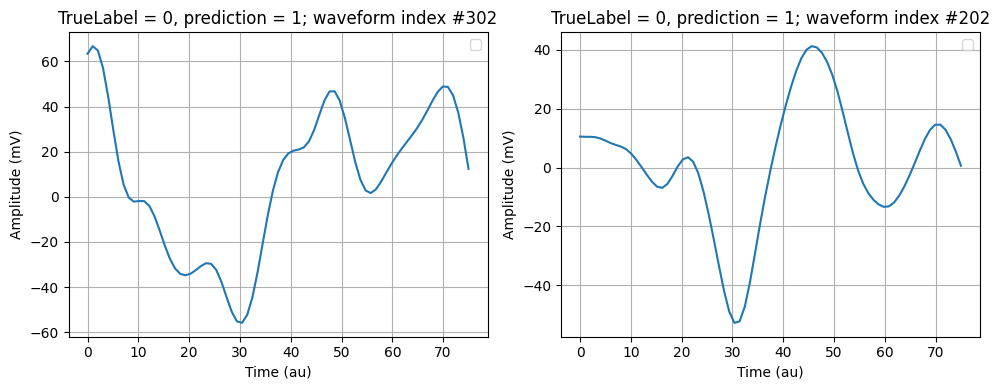

In [51]:
[waveform1, waveform2, label1, label2] = generate(data, 302, 202)
plot_wave(waveform1, waveform2, label1, label2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


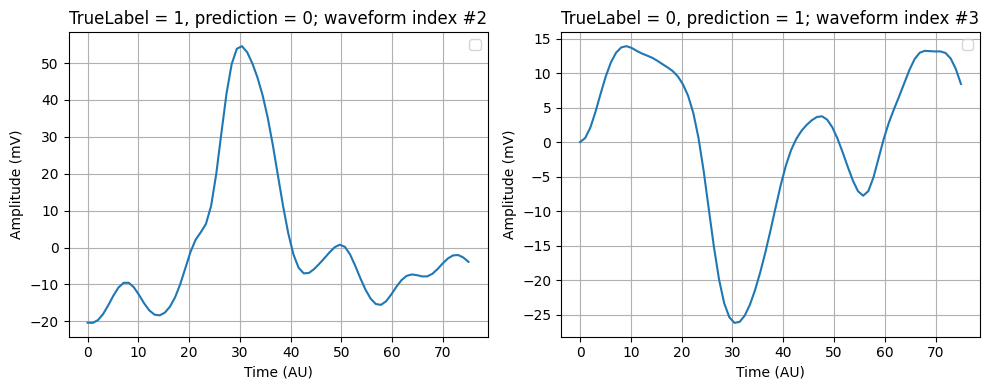

In [71]:
[waveform1, waveform2, label1, label2] = generate(data, 2, 3)
plot_wave(waveform1, waveform2, label1, label2)

# Extract all False Negatives

In [60]:
false_negatives = data[(data['TrueLabel'] == 1) & (data['Prediction'] == 0)]
df_false_negatives = false_negatives.copy()
df_false_negatives.head
df_false_negatives.reset_index(drop=True, inplace=True)

In [61]:
df_false_negatives['waveform']

0       [-1.0406620750379925, -0.8445126251176561, -0....
1       [-20.36218906111926, -20.421900864866227, -19....
2       [7.420490178791674, 14.921730603482892, 18.980...
3       [-2.0790846891496493, -3.5095960757351436, -5....
4       [-1.2216202750202394, -2.4433209646999705, -4....
                              ...                        
9408    [-9.601102276011133, -11.708081777520041, -13....
9409    [-5.107781775328408, -4.309689821571436, -3.35...
9410    [-1.4918031293528604, -2.976225024757964, -3.0...
9411    [7.996024549245126, 6.059268749990986, 3.53228...
9412    [-9.805750573785192, -5.7808687816803666, -1.6...
Name: waveform, Length: 9413, dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


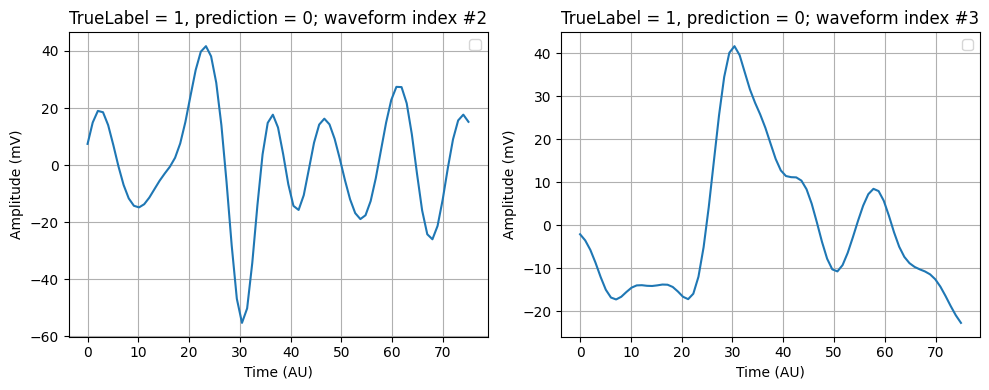

In [72]:
[waveform1, waveform2, label1, label2] = generate(df_false_negatives, 2, 3)
plot_wave(waveform1, waveform2, label1, label2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


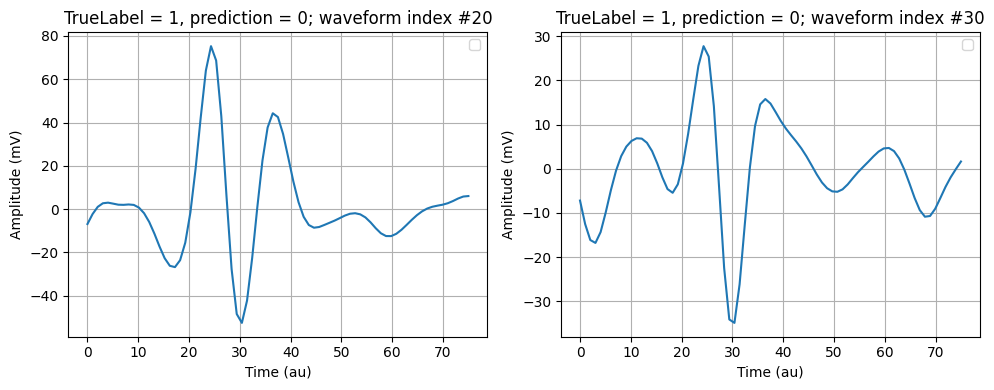

In [63]:
[waveform1, waveform2, label1, label2] = generate(df_false_negatives, 20, 30)
plot_wave(waveform1, waveform2, label1, label2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


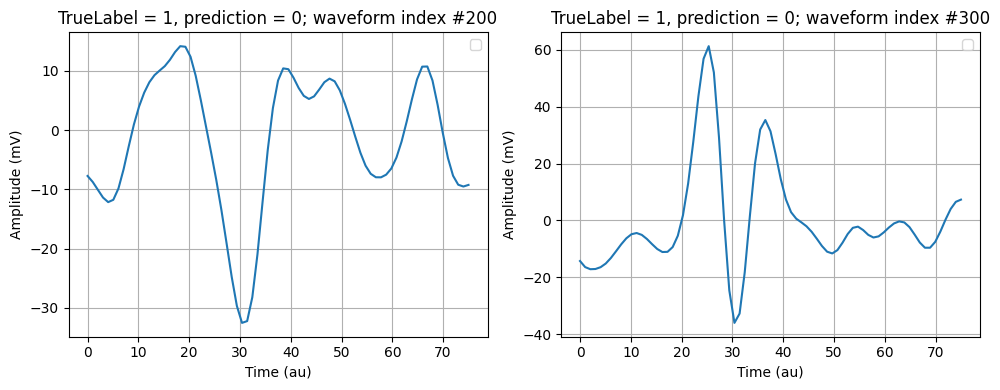

In [64]:
[waveform1, waveform2, label1, label2] = generate(df_false_negatives, 200,300)
plot_wave(waveform1, waveform2, label1, label2)

# Extract False Positives

In [68]:
false_positives = data[(data['TrueLabel'] == 0) & (data['Prediction'] == 1)]
df_false_positives = false_positives.copy()
df_false_positives.reset_index(drop=True, inplace=True)
df_false_positives.head

<bound method NDFrame.head of                                                 waveform  TrueLabel  \
0      [4.915105079281328, 7.70988315994501, 10.73303...          0   
1      [0.02841416155469005, 0.604403705601508, 2.119...          0   
2      [19.97333772866248, 10.660426531627358, 1.8768...          0   
3      [25.13430952146649, 15.473009648041492, 6.4458...          0   
4      [16.32971749030072, 15.586326671161183, 14.230...          0   
...                                                  ...        ...   
11678  [-3.4166879629529654, -2.161497386143672, 0.01...          0   
11679  [-2.97935210818767, -6.452986479282135, -7.282...          0   
11680  [134.81398484567808, 120.94542545933034, 101.3...          0   
11681  [-13.166684964345606, -14.190057978309119, -12...          0   
11682  [2.5252167243468264, 0.8216663095145034, -1.63...          0   

       Prediction  
0               1  
1               1  
2               1  
3               1  
4               1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


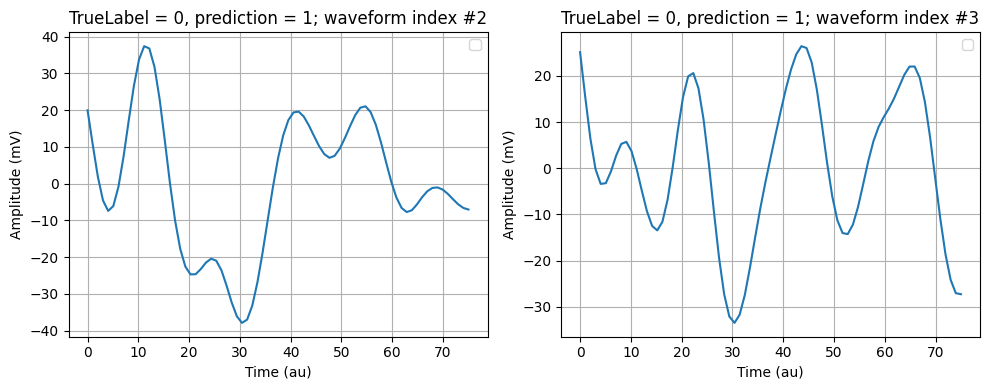

In [69]:
[waveform1, waveform2, label1, label2] = generate(df_false_positives, 2, 3)
plot_wave(waveform1, waveform2, label1, label2)